In [2]:
from spatialtransformer import *
import theano
from theano import tensor as T
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from load_data import *

In [5]:
'''
import theano.sparse
rng = np.random.RandomState(12345)
#img = cv2.imread("img2.jpg").astype(np.float32)
#img = img / 255.0
img = np.random.rand(28,28,3).astype(np.float32)
img = np.expand_dims(img, axis = 0)
img = img.transpose(0,3,1,2)
theta_t = np.array([1,0,0,0,1,0])
theta_t = np.expand_dims(theta_t, axis = 0).astype(np.float32)

img_shared = theano.shared(np.asarray(img, dtype = np.float32), borrow = True)
theta_shared = theano.shared(np.asarray(theta_t, dtype = np.float32), borrow = False)
'''
dataset = load_mnist()
batch_size = 100
# partition into relevant datasets
train_set_x, train_set_y = dataset[0]
valid_set_x, valid_set_y = dataset[1]
test_set_x , test_set_y  = dataset[2]

# compute minibatches
n_train_batches = train_set_x.get_value(borrow=True).shape[0]
n_valid_batches = valid_set_x.get_value(borrow=True).shape[0]
n_test_batches = test_set_x.get_value(borrow=True).shape[0]
n_train_batches //= batch_size
n_valid_batches //= batch_size
n_test_batches //= batch_size
scale = 2
input_dim = (batch_size, 1, 28, 28)

x = T.matrix('x')

layer0_input = x.reshape((batch_size, 1, 28, 28))
scaled_input = T.signal.pool.pool_2d(layer0_input, (scale, scale), ignore_border = True)
trans_img = STN_CNN(input_dim, layer0_input, scale = 2)
params = trans_img.params
output = trans_img.output
theta = trans_img.theta
cost = T.mean((output - scaled_input)**2)
grads = T.grad(cost, params)    
updates = [
    (param_i, param_i - 0.1 * grad_i)
    for param_i, grad_i in zip(params, grads)
]
train_model = theano.function(
    [],
    [cost, theta, output], 
    updates=updates,
    givens={
        x: train_set_x[0:batch_size]
    }
)
print "start training"
for i in range(50):
    output = train_model()
    print output[0]
result = output[2]


start training
0.542972743511
0.508886754513
0.446189671755
0.389771729708
0.26588177681
0.0975446924567
0.0803844556212
0.0711917355657
0.0689558088779
0.0668961405754
0.0658312439919
0.0643237829208
0.0637033581734
0.0626346766949
0.0623720176518
0.0613438077271
0.0613313466311
0.0606444738805
0.0615801177919
0.0612829104066
0.0640852376819
0.0607369877398
0.0638158991933
0.0605087578297
0.0643034055829
0.0604194290936
0.0650771707296
0.0603170283139
0.0656796991825
0.0600042901933
0.0653463304043
0.0593513771892
0.0642707198858
0.058585241437
0.0630275532603
0.0579895749688
0.0625742450356
0.0578130781651
0.0628202706575
0.0572418905795
0.0617517083883
0.0570652112365
0.0617539063096
0.0565012171865
0.0614793971181
0.0561434924603
0.0606108494103
0.0561183951795
0.0613432265818
0.0557843185961


(1, 14, 14)


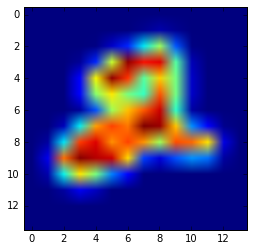

In [8]:
print result[2].shape
plt.imshow(result[5].reshape(14,14))

In [8]:
dataset = load_mnist()
batch_size = 100
# partition into relevant datasets
train_set_x, train_set_y = dataset[0]
valid_set_x, valid_set_y = dataset[1]
test_set_x , test_set_y  = dataset[2]

# compute minibatches
n_train_batches = train_set_x.get_value(borrow=True).shape[0]
n_valid_batches = valid_set_x.get_value(borrow=True).shape[0]
n_test_batches = test_set_x.get_value(borrow=True).shape[0]
n_train_batches //= batch_size
n_valid_batches //= batch_size
n_test_batches //= batch_size
scale = 2
input_dim = (batch_size, 1, 28, 28)

x = T.matrix('x')

layer0_input = x.reshape((batch_size, 1, 28, 28))
trans_img = STN_CNN(input_dim, layer0_input, [100,100,100])
params = trans_img.params
output = trans_img.output
theta = trans_img.theta
cost = T.mean((output - layer0_input)**2)
grads = T.grad(cost, params)    
updates = [
    (param_i, param_i - 0.5 * grad_i)
    for param_i, grad_i in zip(params, grads)
]
train_model = theano.function(
    [],
    [cost, theta, output], 
    updates=updates,
    givens={
        x: train_set_x[0:batch_size]
    }
)
print "start training"
for i in range(50):
    output = train_model()
    print output[0]
result = output[2]


start training
0.418556243181
0.108208805323
0.107311688364
0.107281669974
0.10735937953
0.107364915311
0.107248798013
0.107150182128
0.10713814944
0.10713801533
0.107137925923
0.107137225568
0.107136681676
0.107136242092
0.107135735452
0.107134982944
0.10713429749
0.107133865356
0.107133589685
0.107133440673
0.107133366168
0.107133314013
0.107133306563
0.107133291662
0.107133276761
0.10713326931
0.10713326931
0.107133254409
0.107133254409
0.107133254409
0.107133239508
0.107133239508
0.107133239508
0.107133232057
0.107133232057
0.107133232057
0.107133217156
0.107133217156
0.107133217156
0.107133202255
0.107133202255
0.107133194804
0.107133194804
0.107133194804
0.107133179903
0.107133179903
0.107133179903
0.107133165002
0.107133165002
0.107133165002


(1, 28, 28)


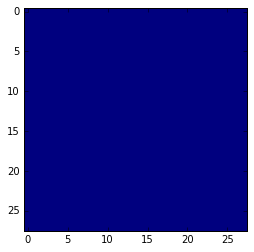

In [6]:
print result[2].shape
plt.imshow(result[0].reshape(28,28))